<a href="https://colab.research.google.com/github/jgchen716/spotify-ml/blob/main/Spotify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Playlists with Machine Learning (Attempt 1)

Find the Spotify dataset [here](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

## Initial Setup

In [ ]:
!apt install libkrb5-dev
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user
!pip install afinn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 34 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
import os
import json

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS545_2021')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'SPOTIFY_PROJECT')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Mounted at /content/gdrive


In [ ]:
# get json paths for each individual json file
json_path1 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.0-999.json")
json_path2 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.2000-2999.json")
json_path3 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.3000-3999.json")
json_path4 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.6000-6999.json")
json_path5 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.7000-7999.json")
json_path6 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.8000-8999.json")
json_path7 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.9000-9999.json")
json_path8 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.10000-10999.json")
json_path9 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.13000-13999.json")
json_path10 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.15000-15999.json")
json_path11 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.16000-16999.json")
json_path12 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.19000-19999.json")
json_path13 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.22000-22999.json")
json_path14 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.27000-27999.json")
json_path15 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.28000-28999.json")
json_path16 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.31000-31999.json")
json_path17 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.32000-32999.json")
json_path18 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.34000-34999.json")
json_path19 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.37000-37999.json")
json_path20 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.38000-38999.json")
json_path21 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.41000-41999.json")
json_path22 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.42000-42999.json")
json_path23 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.44000-44999.json")
json_path24 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.47000-47999.json")
json_path25 = os.path.join(HOMEWORK_FOLDER, "mpd.slice.51000-51999.json")

## Data Cleaning and Data Wrangling

In [ ]:
paths = [json_path1, json_path2, json_path3, json_path4, json_path5, 
         json_path6, json_path7, json_path8, json_path9, json_path10, 
         json_path11, json_path12, json_path13, json_path14, json_path15, 
         json_path16, json_path17, json_path18, json_path19, json_path20, 
         json_path21, json_path21, json_path23, json_path24, json_path25]

# create list of dataframes from each json path   
df_list = []
for json_path in paths:
  data = json.load(open(json_path))
  df = pd.DataFrame(data['playlists'])
  df_list.append(df)

# create master playlist df by unioning each df in df_list
playlist_df = pd.concat(df_list)

In [ ]:
playlist_df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,reg,false,51995,1504656000,96,75,1,"[{'pos': 0, 'artist_name': 'Ozuna', 'track_uri...",18,21177811,42,NaN
996,hindi,false,51996,1441324800,76,46,1,"[{'pos': 0, 'artist_name': 'Mohammed Rafi', 't...",2,25435178,20,NaN
997,New,false,51997,1508025600,66,52,1,"[{'pos': 0, 'artist_name': 'DJ Drama', 'track_...",47,14452236,41,NaN
998,Lit 🔥,false,51998,1509321600,64,52,1,"[{'pos': 0, 'artist_name': 'Drake', 'track_uri...",12,14188750,44,NaN


In [ ]:
# Create tracks df to map playlist id (pid) to data for each track
df_rows = []
for path in paths:
  data = json.load(open(path))
  
  for d in range(len(data['playlists'])):
    entry = data['playlists'][d]
    track_list = entry['tracks']

    for item in track_list:
      item['pid'] = entry['pid']
      df_rows.append(item)

tracks_df = pd.DataFrame(df_rows)

In [ ]:
tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0
...,...,...,...,...,...,...,...,...,...
1667960,211,Tom Petty,spotify:track:7gSQv1OHpkIoAdUiRLdmI6,spotify:artist:2UZMlIwnkgAEDBsw1Rejkn,I Won't Back Down,spotify:album:5d71Imt5CIb7LpQwDMQ093,178360,Full Moon Fever,51999
1667961,212,Tom Petty,spotify:track:5tVA6TkbaAH9QMITTQRrNv,spotify:artist:2UZMlIwnkgAEDBsw1Rejkn,Free Fallin',spotify:album:5d71Imt5CIb7LpQwDMQ093,256000,Full Moon Fever,51999
1667962,213,Aerosmith,spotify:track:6gQUbFwwdYXlKdmqRoWKJe,spotify:artist:7Ey4PD4MYsKc5I2dolUwbH,Dude (Looks Like A Lady),spotify:album:3XYqOJI1YlX40kJTdzFEzp,265773,Permanent Vacation,51999
1667963,214,Pearl Jam,spotify:track:6QewNVIDKdSl8Y3ycuHIei,spotify:artist:1w5Kfo2jwwIPruYS2UWh56,Even Flow,spotify:album:5B4PYA7wNN4WdEXdIJu58a,292580,Ten,51999


## Visualizing the Data Set & Setting Our Goals: What Does Our Data Look Like?

### A sample data point
Our playlist data has lots of information on each Spotify playlist itself, as well as information on the individual tracks themselves. All this information is held in several smaller json files containing 1000 rows each. Check out an example below! 

In [ ]:
%%html
<img src="https://drive.google.com/uc?export=view&id=1qfhU-mihDWEEuWvxMnXY1xabXwr_0tXS"></img>

One cool thing about our dataset that's worth noting is that it also came with some summary statistics in a `txt` file. For example, they had the number of tracks, number of unique tracks, top playlist titles, and a lot more (screenshot is shown below)! *Note that these summary statistics were taken over all 1 million rows in this dataset, whereas our project used a smaller sample of 25000 rows.*

In [ ]:
%%html
<img src="https://drive.google.com/uc?export=view&id=16-taa2urXoS8vSJN_KWApy9OGP2e-GV1"></img>

### So... what are we working with?
Let's visualize some of the basic information about the data and get a sense of this sampling of playlists. We will answer several of the basic questions: 
*   What are the top 25 songs found in playlists? How many playlists do each of these songs appear in?
*   What is the average playlist length in minutes?
*   What is the average number of songs per playlist?
*   On average, how many songs per artist are found in the same playlist?
*   On average, how many different albums are present in one playlist?
*   On average, how many different artists are present in one playlist?
*   What percentage of playlists are collaborative, i.e. shared with other users?

*   What is the average duration of a given song on a playlist?
*   Is there a relationship between average song length and playlist length?
*   Are playlist titles usually positive, negative, or neutral? (Sentiment Analysis)



#### Looking at Number of Artists, Number of Albums, Number of Tracks, and Playlist Duration

In [ ]:
playlist_df['duration_min'] = playlist_df['duration_ms'].apply(lambda x: x/60000)

Text(0.5, 1.0, 'Playlist Duration (min)')

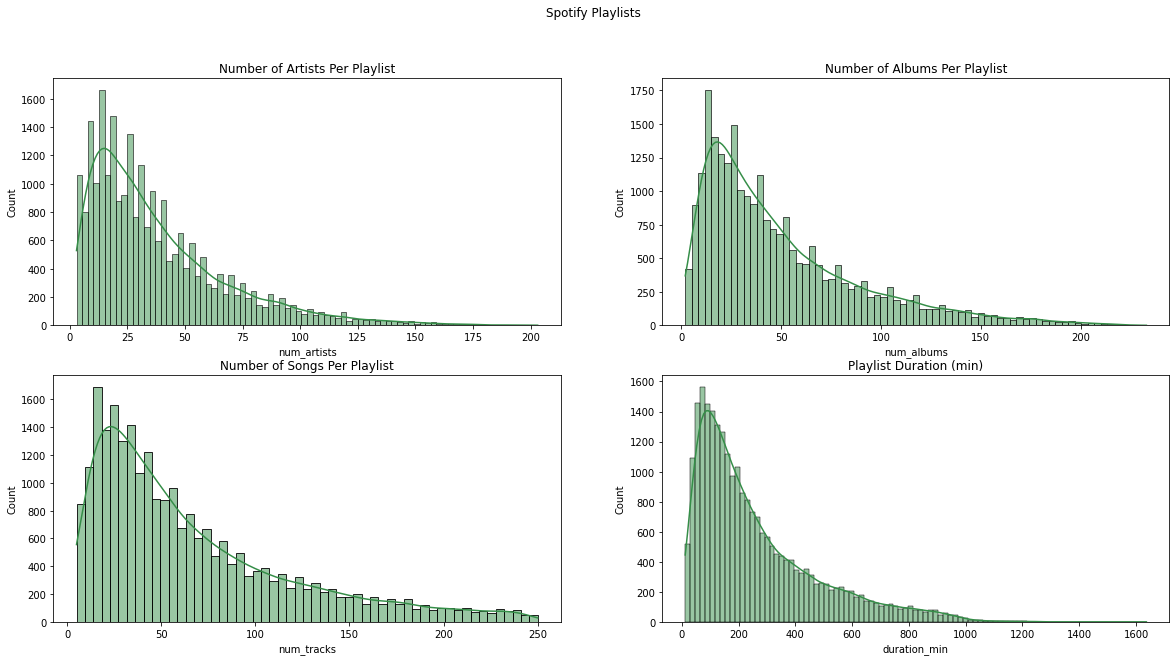

In [ ]:
sns.set_palette("PRGn_r")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Spotify Playlists')

# number of artists
sns.histplot()
sns.histplot(data=playlist_df, x="num_artists", kde=True, ax=axes[0][0])
axes[0][0].set_title("Number of Artists Per Playlist")

# number of albums
sns.histplot(data=playlist_df, x="num_albums", kde=True, ax=axes[0][1])
axes[0][1].set_title("Number of Albums Per Playlist")

# number of songs
sns.histplot(data=playlist_df, x="num_tracks", kde=True, ax=axes[1][0])
axes[1][0].set_title("Number of Songs Per Playlist")

# duration in minutes
sns.histplot(data=playlist_df, x="duration_min", kde=True, ax=axes[1][1])
axes[1][1].set_title("Playlist Duration (min)")

### What are the top 25 songs found in playlists? How many playlists do each of these songs appear in?

In [ ]:
# count top 100 songs
from collections import Counter

song_counter = Counter(tracks_df['track_name'])
top25_count = song_counter.most_common(25)
top25_df = pd.DataFrame(top25_count)
top25_df.columns=['Song Name', 'Frequency']

fig0 = px.bar(top25_df, x='Song Name', y='Frequency')
fig0.show()

### What is the average playlist length in minutes?

In [ ]:
from math import floor

# average playlist length in minutes
average_playlist_length_min = playlist_df['duration_min'].mean()
print("Average Playlist Length in Minutes:", average_playlist_length_min)

hours = floor(average_playlist_length_min / 60)
extra_mins = round(average_playlist_length_min - hours * 60)
print("In other words, the average playlist is {hrs} hours and {mins} minutes long.".format(hrs=hours, mins=extra_mins))

Average Playlist Length in Minutes: 260.9240714773331
In other words, the average playlist is 4 hours and 21 minutes long.


### What is the average number of songs per playlist?

In [ ]:
song_count = tracks_df.groupby(['pid'])['artist_name'].count()
avg_num_songs = sum(song_count)/len(song_count)

print("Average Number of Songs Per Playlist:", avg_num_songs)

Average Number of Songs Per Playlist: 69.49854166666667


### On average, how many songs per artist are found in the same playlist?

In [ ]:
# empty list to store average number of songs per artist for each playlist
avg_songs_per_artist = []

# split playlist_df based on pid
list_of_dfs = []
for _, g in tracks_df.groupby(tracks_df['pid']):
    list_of_dfs.append(g)

# count number of songs per artist in each playlist 
for df in list_of_dfs:
  c = Counter(df['artist_name'].tolist())
  # divide total number of songs by total number of artists, append to list
  avg_songs_per_artist.append(sum(c.values()) / len(c.keys()))

final_avg_songs_per_artist = sum(avg_songs_per_artist)/len(avg_songs_per_artist)
print("On average, for each artist in a given playlist, that playlist will contain {num:.2f} songs by that artist.".format(num=final_avg_songs_per_artist))

On average, for each artist in a given playlist, that playlist will contain 2.25 songs by that artist.


[Text(0.5, 0, '$log_{10}(number \\; of \\; songs \\; per \\; artist)$')]

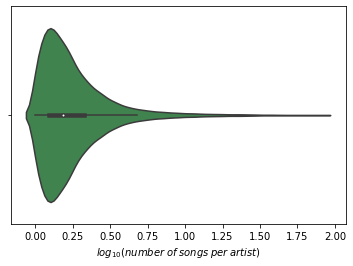

In [ ]:
from math import log

song_per_artist_df = pd.DataFrame(avg_songs_per_artist)
song_per_artist_df.columns=['avg_songs']
song_per_artist_df['log_avg_songs'] = song_per_artist_df['avg_songs'].apply(lambda x: log(x, 10))
ax = sns.violinplot(x=song_per_artist_df['log_avg_songs'], log_scale=True, kde=True)
ax.set(xlabel="$log_{10}(number \; of \; songs \; per \; artist)$")

### On average, how many different albums are present in one playlist?

In [ ]:
# list to store number of albums in each playlist
num_albums_list = []
# list to store number of artists in each playlist
num_artists_list = []

for df in list_of_dfs:
  num_albums = Counter(df['album_name'])
  num_albums_list.append(len(num_albums))

  num_artists = Counter(df['artist_name'])
  num_artists_list.append(len(num_artists))

In [ ]:
avg_num_albums = sum(num_albums_list)/len(num_albums_list)
print("Average number of albums in playlist:", avg_num_albums)

Average number of albums in playlist: 48.940958333333334


### On average, how many different artists are present in one playlist?

In [ ]:
avg_num_artists = sum(num_artists_list)/len(num_artists_list)
print("Average number of artists in playlist:", avg_num_artists)

Average number of artists in playlist: 38.24475


### What is the average number of followers on a given playlist?

In [ ]:
avg_num_followers = playlist_df['num_followers'].mean()
print("Average Number of Followers Per Playlist:", avg_num_followers)

Average Number of Followers Per Playlist: 2.43856


### What percentage of playlists are collaborative, i.e. shared with other users?

In [ ]:
collaborative_count = playlist_df.groupby(['collaborative']).count()['name'].tolist()
percent_collab = collaborative_count[1] / sum(collaborative_count)
print("Percentage of Playlists that are Collaborative:", percent_collab)

Percentage of Playlists that are Collaborative: 0.02212


### What is the average length of a song in a playlist?

In [ ]:
average_duration_song = sum(tracks_df['duration_ms'])/len(tracks_df['duration_ms'])
average_duration_song = average_duration_song / 60000
minutes = floor(average_duration_song)
seconds = round((average_duration_song - minutes) * 60)
print("The average length of a song in a playlist is {mins} minutes and {secs} seconds.".format(mins=minutes, secs=seconds))

The average length of a song in a playlist is 3 minutes and 55 seconds.


### Is there a relationship between average song length in a playlist and average playlist length?

In [ ]:
playlist_df['avg_song_length_min'] = playlist_df['duration_min'] / playlist_df['num_tracks']

[Text(0, 0.5, 'Playlist Duration (min)'),
 Text(0.5, 0, 'Average Song Length (min)')]

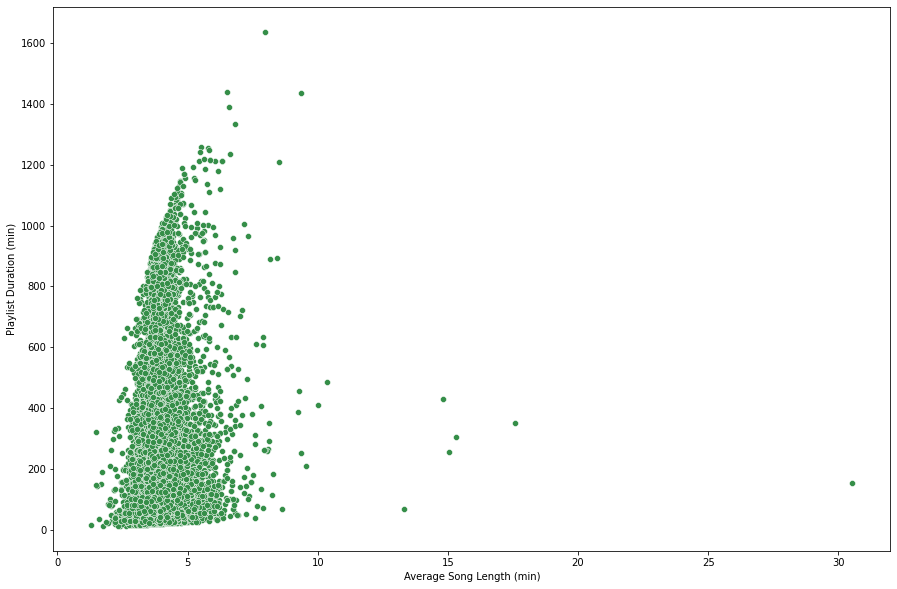

In [ ]:
figure = plt.gcf()
figure.set_size_inches(15, 10)
ax1 = sns.scatterplot(data=playlist_df, x="avg_song_length_min", y="duration_min")
ax1.set(xlabel="Average Song Length (min)", ylabel="Playlist Duration (min)")

Overall, the scatterplot suggests there might be *some* relationship (potentially a weak linear relationship) between average song length in a playlist and playlist duration.

### Are playlist titles usually positive, negative, or neutral? (Sentiment Analyis)
Using Afinn:

In [ ]:
# Sentiment Analysis using AFINN score:
from afinn import Afinn
af = Afinn()

def get_playlist_sentiment_afinn(name):
  words = name.split()
  total_score = 0
  # calculate AFINN score for playlist name
  for word in words:
    total_score += af.score(word)
  
  if total_score > 0:
    return "positive"
  elif total_score < 0:
    return "negative"
  else:
    return "neutral"

playlist_df['sentiment_afinn'] = playlist_df['name'].apply(get_playlist_sentiment_afinn)

In [ ]:
sentiment_list = playlist_df['sentiment_afinn'].tolist()
sentiment_counts = Counter(sentiment_list)
sentiment_counts

Counter({'negative': 657, 'neutral': 22251, 'positive': 2092})

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sentiment')]

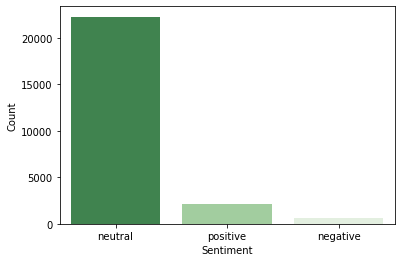

In [ ]:
sentiment_df = pd.DataFrame.from_dict(sentiment_counts, orient='index').reset_index()
sentiment_df.columns = ["sentiment", "count"]
ax2 = sns.barplot(x="sentiment", y="count", data=sentiment_df)
ax2.set(xlabel="Sentiment", ylabel="Count")

# Machine Learning with Spotify (Attempt 2)

Quick Recap:
After spending a little too much trying to work with the previous dataset, we realized that trying to recommend songs based solely on the categorical variables we had—`track_name`, `artist_name`, `album_name`, and other crude metrics—would not be a prudent decision. After all, just because we might like one song on an album does not mean we'll like them all. That being said, we decided to pivot and take a look at the Spotify API data. 

The Spotify API has information similar to our original dataset, but *unlike* our other dataset, the Spotify API also has many other features that we could train our ML model on, such as acousticness, danceability, loudness, etc. These features seemed like much more reasonable metrics to train a model on (and also are numeric!), so we decided to continue with the Spotify API data instead.

## Setting Up the Spotify API and Spotipy

In [ ]:
!pip3 install 'spotipy==2.15'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException
import spotipy.util as util
import types

In [ ]:
scope = "user-library-read playlist-read-collaborative"

client_id = 'e8dd057b45274ed9898cebee7407f63c'
client_secret = '2aeee29be2fb495b8e19a6c565e4e7e8'
redirect_uri = 'https://www.google.com'

username = 'massivemusic.com'

In [ ]:
def _get_auth_response_interactive(self, open_browser=True):
        if not open_browser:
            self._open_auth_url()
            prompt = "Enter the URL you were redirected to: "
        else:
            url = self.get_authorize_url()
            prompt = (
                "Go to the following URL: {}\n"
                "Enter the URL you were redirected to: ".format(url)
            )
        response = self._get_user_input(prompt)
        state, code = SpotifyOAuth.parse_auth_response_url(response)
        if self.state is not None and self.state != state:
            raise SpotifyStateError(self.state, state)
        return code

In [ ]:
my_auth = SpotifyOAuth(client_id=client_id, client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope, username=username)

my_auth._get_auth_response_interactive = types.MethodType(_get_auth_response_interactive, my_auth)
sp = spotipy.Spotify(auth_manager=my_auth)

## Data Loading, Wrangling, and Cleaning (Round 2)
Let's first get all our songs! For our big data example, we'll be using making playlist from [this](https://open.spotify.com/user/massivemusic.com) collection of songs, which contains over 10,000 songs.

In [ ]:
spotify_user = 'massivemusic.com'
big_playlist_id = '1hMzceeWw7QiI6vaBkcEJO'

In [ ]:
# read in tracks for a particular playlist using spotipy
def get_playlist(user, playlist_id, curr_sp):
  # params:
  # user - current Spotify user's ID
  # playlist_id - Spotify ID of playlist
  # curr_sp - current auth 

  if playlist_id is None:
      playlist_id = raw_input('Playlist ID: ')
      
  playlist = curr_sp.user_playlist(user, playlist_id)
  return playlist

# get playlist name from playlist object
def get_playlist_name(playlist):
  name = playlist['name']
  return name

# get genres from playlist
def get_genres_from_playlist(user, playlist_id, curr_sp):
  # params:
  # user - current Spotify user's ID
  # playlist_id - Spotify ID of playlist
  # curr_sp - current auth 

  # return:
  # frequency dict of genres associated with tracks
  genre_count = {}
  playlist = get_playlist(user, playlist_id, curr_sp)
  tracks = all_playlist_tracks(playlist, curr_sp)
  for item in tracks:
      track = item['track']
      artists = track['artists']
      for artist in artists:
          artist_id = artist['id']
          if artist_id is not None:
              artist_obj = curr_sp.artist(artist_id)
              genres = artist_obj['genres']
              for genre in genres:
                  if genre in genre_count:
                      genre_count[genre] = genre_count[genre] + 1;
                  else:
                      genre_count[genre] = 1;
  return genre_count  

# get all songs/track objects from a playlist object
def all_playlist_tracks(playlist, curr_sp):
  # params: 
  # playlist - playlist object
  # curr_sp - current auth 

  # returns:
  # list of track objects

  results = playlist['tracks']
  tracks = results['items']
  while results['next']:
      results = curr_sp.next(results)
      tracks.extend(results['items'])
  return tracks

# get genres from tracks
def get_genres_from_tracks(tracks, curr_sp):
  # params:
  # tracks - set of track objects

  # returns:
  # genre_count - frequency list of genres associated with tracks

  genre_count = {}
  for track in tracks:
      artists = track['artists']
      for artist in artists:
          artist_id = artist['id']
          if artist_id is not None:
              artist_obj = curr_sp.artist(artist_id)
              genres = artist_obj['genres']
              for genre in genres:
                  if genre in genre_count:
                      genre_count[genre] = genre_count[genre] + 1;
                  else:
                      genre_count[genre] = 1;
  return genre_count  

In [ ]:
# get tracks from big data playlist with 10k+ songs
mm_playlist = get_playlist(spotify_user, big_playlist_id, sp)
mm_tracks = all_playlist_tracks(mm_playlist, sp)

Couldn't read cache at: .cache-massivemusic.com


Go to the following URL: https://accounts.spotify.com/authorize?client_id=e8dd057b45274ed9898cebee7407f63c&response_type=code&redirect_uri=https%3A%2F%2Fwww.google.com&scope=playlist-read-collaborative+user-library-read
Enter the URL you were redirected to: https://www.google.com/?code=AQAe4UBqmfq6bGTEQ2uR8xJPR1gHz0erqSSVAD1_dl2TtAwWqEEY4w-NGsalmJCcw_0eVjcTYqDYksMx5pkD8njIC5CxQizpK2K-7oKvQBX0N1SvtA4bR8OzZeiBsxOTW9zOID3dH-4VHGR2q0ocFeyNdbJ84NpQbNYp6JjK2DZDc5RVyerjBZfvECrjcdxP_X7XphRElo1aN4EE7KneHmeWXOkqswwv1mA


In [ ]:
def get_audio_features_from_playlist(user, playlist_id, curr_sp):
  # params:
  # user - current Spotify user's ID
  # playlist_id - Spotify ID of playlist
  # curr_sp - current auth 

  # return:
  # pandas dataframe with audio features for each track
  ids = []
  names = []
  afs = []
  playlist = get_playlist(user, playlist_id, curr_sp)
  if(playlist):
    playlist_name = get_playlist_name(playlist)
    tracks = all_playlist_tracks(playlist, curr_sp)
    for track in tracks:
        if(track):
          id = track['track']['id']
          name = track['track']['name'].encode('utf-8').decode()
          if id and name:
            audio_features = curr_sp.audio_features(id)[0]
            if audio_features:
              audio_features['id'] = id;
              audio_features['name'] = name;
              afs.append(audio_features)
  audio_df = pd.DataFrame(afs)

  audio_df = audio_df[["name", "id", "acousticness", "danceability", "duration_ms", 
   "energy", "instrumentalness", "key", "liveness",
                          "loudness", "mode", "speechiness", "tempo", "valence"]]
  return audio_df

def get_audio_features_from_tracks(tracks, curr_sp):
  # params:
  # tracks - set of track objects
  # curr_sp - current auth 

  # returns:
  # pandas dataframe with audio features for each track
  afs = []
  for track in tracks:
        if(track):
          id = track['id']
          name = track['name'].encode('utf-8').decode()
          if id and name:          
            audio_features = curr_sp.audio_features(id)[0]
            if audio_features:
              audio_features['id'] = id;
              audio_features['name'] = name;
              if('played_at' in track):
                audio_features['played_at'] = track['played_at'];
              afs.append(audio_features)
  audio_df = pd.DataFrame(afs)


  if 'played_at' in audio_df.columns:
    audio_df = audio_df[["name", "id", "played_at", "acousticness", "danceability", "duration_ms", 
   "energy", "instrumentalness", "key", "liveness",
                             "loudness", "mode", "speechiness", "tempo", "valence"]]
  else: 
    audio_df = audio_df[["name", "id", "acousticness", "danceability", "duration_ms", 
   "energy", "instrumentalness", "key", "liveness",
                             "loudness", "mode", "speechiness", "tempo", "valence"]]
  return audio_df

In [ ]:
audio_df = get_audio_features_from_playlist(spotify_user, big_playlist_id, sp)
audio_df.head(10)

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Under My Thumb,3E8gEvhLia6w9lQv3hfxzM,0.29800,0.738,221533,0.491,0.218000,6,0.1190,-13.407,0,0.0487,126.960,0.809
1,00h00,00LvjMnpznr4MZFSA8x9sA,0.33900,0.375,51373,0.606,0.000924,4,0.4240,-9.383,0,0.1970,91.564,0.883
2,Conquer Me,2jjPlj6KFzCffJ7KVQMwHX,0.21300,0.657,216235,0.488,0.094200,8,0.3600,-10.416,0,0.0456,149.763,0.662
3,Dapper (feat. Anderson .Paak),3seHx466iTcUmWE9dOVB3v,0.07110,0.753,193093,0.594,0.000000,1,0.3910,-9.486,0,0.0816,112.568,0.562
4,Sun Is Shining,3PPigifoeEofIISQYbayMK,0.12100,0.784,134573,0.520,0.001580,0,0.1460,-8.270,1,0.2270,72.678,0.854
5,Water Fountain,3pndgH9sLDTCWtCwr8LWt9,0.00337,0.825,183453,0.690,0.002770,1,0.3670,-6.234,1,0.0650,110.488,0.589
6,Ride A White Swan,3olQaoZDc2O1mFDod0evZI,0.79300,0.342,132800,0.442,0.000105,8,0.0758,-9.782,1,0.0346,147.700,0.804
7,Whatcha See Is Whatcha Get,6J7uQ9vLtBqNikEhlKUOnu,0.22600,0.638,212840,0.708,0.000000,6,0.1200,-10.383,1,0.1280,153.144,0.904
8,In Love With You,6uI95ERPZV6tivkNWsOKet,0.58000,0.720,322533,0.272,0.000000,9,0.1450,-12.919,0,0.0683,132.494,0.661
9,Sunday Girl,23yv078f5kc08Kj6DMpO0t,0.02560,0.641,185067,0.531,0.000248,9,0.1780,-13.691,1,0.0496,145.886,0.846


## Let's do some data visualization!

In [ ]:
# import statements for k-means clustering and normalization, spotify data visualization
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import plotly.express as px

First, let's take a look at some of our features. We're gonna start by looking at key, which refers to the musical key of the song, and mode, which indicates a track's modality (major or minor), such that 1 corresponds to major and 0 corresponds to minor.

Text(0.5, 1.0, 'Number of Songs Per Key')

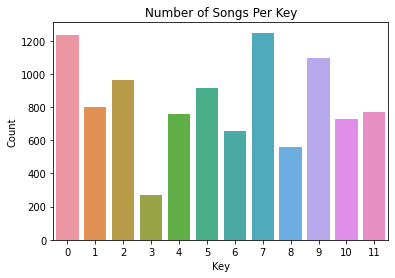

In [ ]:
from collections import Counter

# get counts for each key
key_counter = Counter(audio_df['key'])

# create df for bar graph
key_df = pd.DataFrame.from_dict(key_counter, orient='index').reset_index()
key_df.columns = ['Key', 'Count']

# create bar plot for keys
sns.barplot(x='Key', y='Count', data=key_df).set_title('Number of Songs Per Key')

Text(0.5, 1.0, 'Number of Songs Per Mode')

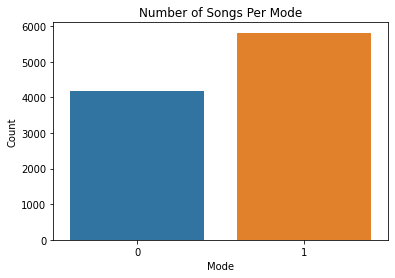

In [ ]:
# get counts for each mode, convert to df
mode_df = pd.DataFrame.from_dict(Counter(audio_df['mode']), orient='index').reset_index()
mode_df.columns = ['Mode', 'Count']

# make mode bar plot
sns.barplot(x='Mode', y='Count', data=mode_df).set_title('Number of Songs Per Mode')

Based on the graphs above, we can observe that the most popular keys for songs in our playlist dataset are 0 or 7, which correspond to the keys of C and G.

From the mode graph, we also observe that there is roughly a 3:2 ratio of songs that are major vs minor.

Next, let's check the correlation between features.

Text(0.5, 1.0, 'Spotify Feature Correlation Heatmap')

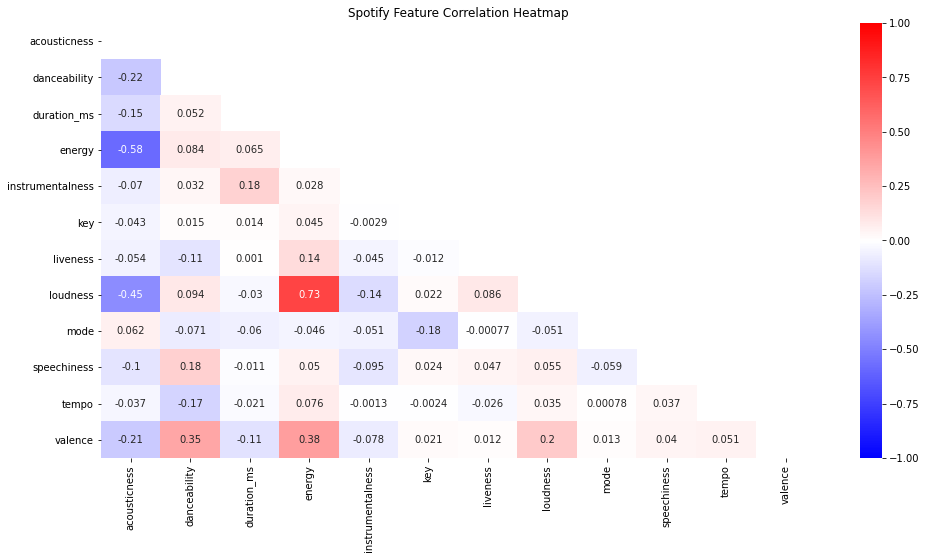

In [ ]:
# create heatmap to look at correlation between features
plt.figure(figsize=(16, 8))
audio_corr = audio_df.corr()

# mask upper triangle to remove repeated information
mask = np.triu(np.ones_like(audio_corr, dtype=np.bool))

heatmap = sns.heatmap(audio_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bwr')
heatmap.set_title("Spotify Feature Correlation Heatmap")


Based on the heatmap shown above, it seems that most of the features appear to have weak or no correlation, with one notable exception being energy and loudness, which have a strong positive correlation. With that in mind, we can safely proceed to run k-means clustering to create our playlists.

# The Grand Finale— Let's Make Some Playlists with ML!

To make our playlists, we ultimately want to run k-means clustering, but first we need to extract the features that we'll be using and scale them using `MinMaxScaler`.

In [ ]:
# columns containing numeric features to run clustering on later
feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# scale data with MinMaxScaler so it's in the range of [0, 1]
features_df = audio_df[feature_cols]
x = features_df.values

# normalize data
min_max_scaler = MinMaxScaler()
x_normalized = min_max_scaler.fit_transform(x)
spotify_ml_df = pd.DataFrame(x_normalized)

We're not sure how many clusters are ideal, so we're going to use the Elbow Method with distortion to see what number of clusters seem ideal. After all, from our previous attempt, we know that the number of songs in most users' playlists tends to be on the smaller end (< 100), but that may not be the ideal number of clusters. Let's find out!

In [ ]:
# apply Elbow Method with distortion to determine ideal number of clusters/playlists
distortion = []                  # list of distortion values
kvals = np.arange(1, 502, 20)    # values to test for number of 
cluster_to_dist = {}             # map number of clusters to distortion

for k in kvals:
  # run k means, fit model
  model = KMeans(init='k-means++', n_clusters=k).fit(x_normalized)
  model.fit(x_normalized)

  # calculate distortion, update data structures
  distortion_val = sum(np.min(cdist(x_normalized, model.cluster_centers_, 'euclidean'), axis=1)) / x_normalized.shape[0]
  distortion.append(distortion_val)
  cluster_to_dist[k] = distortion_val

Text(0.5, 1.0, 'Elbow Method for MM Playlist')

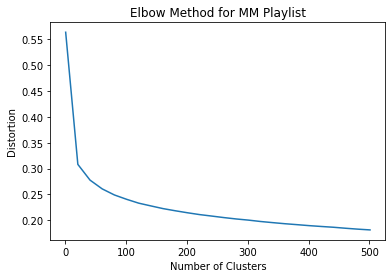

In [ ]:
# plot for elbow method
plt.plot(kvals, distortion)
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method for MM Playlist")

Based on the graph above, we determined that based on the elbow method, a good number of clusters for our data would be k = 40.

In [ ]:
# run final k means clustering
kmeans_model = KMeans(init='k-means++', n_clusters=40).fit(x_normalized)

# add cluster number to dataframes
audio_df['kmeans_cluster'] = kmeans_model.labels_
features_df['cluster'] = kmeans_model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
audio_df

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,kmeans_cluster
0,Under My Thumb,3E8gEvhLia6w9lQv3hfxzM,0.2980,0.738,221533,0.491,0.218000,6,0.1190,-13.407,0,0.0487,126.960,0.809,10
1,00h00,00LvjMnpznr4MZFSA8x9sA,0.3390,0.375,51373,0.606,0.000924,4,0.4240,-9.383,0,0.1970,91.564,0.883,3
2,Conquer Me,2jjPlj6KFzCffJ7KVQMwHX,0.2130,0.657,216235,0.488,0.094200,8,0.3600,-10.416,0,0.0456,149.763,0.662,20
3,Dapper (feat. Anderson .Paak),3seHx466iTcUmWE9dOVB3v,0.0711,0.753,193093,0.594,0.000000,1,0.3910,-9.486,0,0.0816,112.568,0.562,36
4,Sun Is Shining,3PPigifoeEofIISQYbayMK,0.1210,0.784,134573,0.520,0.001580,0,0.1460,-8.270,1,0.2270,72.678,0.854,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Penthiou,4ih6AvAWSD1OBJIxah713h,0.5500,0.683,204952,0.658,0.000920,7,0.1510,-9.968,1,0.0478,118.706,0.563,18
9996,Lijay,57BxU4uqdbl6TITWtnQDMw,0.7050,0.824,324608,0.376,0.011500,3,0.1060,-11.921,1,0.2200,94.013,0.819,6
9997,Pretty Nice Life (feat. Tiken Jah Fakoly),7lL6ND4Jj1tWpoDFaJoxtS,0.5010,0.673,143533,0.568,0.000881,9,0.1390,-6.708,0,0.2390,170.131,0.568,34
9998,Take It Slow - Mousse T. Remix,1PNaGC2ihDmVCldSce119E,0.0972,0.684,216601,0.504,0.000290,9,0.3360,-8.913,1,0.0801,86.226,0.740,3


In [ ]:
features_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.2980,0.738,221533,0.491,0.218000,0.1190,-13.407,0.0487,126.960,0.809,10
1,0.3390,0.375,51373,0.606,0.000924,0.4240,-9.383,0.1970,91.564,0.883,3
2,0.2130,0.657,216235,0.488,0.094200,0.3600,-10.416,0.0456,149.763,0.662,20
3,0.0711,0.753,193093,0.594,0.000000,0.3910,-9.486,0.0816,112.568,0.562,36
4,0.1210,0.784,134573,0.520,0.001580,0.1460,-8.270,0.2270,72.678,0.854,17
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.5500,0.683,204952,0.658,0.000920,0.1510,-9.968,0.0478,118.706,0.563,18
9996,0.7050,0.824,324608,0.376,0.011500,0.1060,-11.921,0.2200,94.013,0.819,6
9997,0.5010,0.673,143533,0.568,0.000881,0.1390,-6.708,0.2390,170.131,0.568,34
9998,0.0972,0.684,216601,0.504,0.000290,0.3360,-8.913,0.0801,86.226,0.740,3


In [ ]:
# create dataframe with normalized features
normalized_df = pd.DataFrame(x_normalized)
normalized_df.columns = feature_cols

# create dataframe with means of features for polar plot
agg_audio_df = pd.DataFrame()

# empty lists for dataframe columns
features = []
values = []
clusters = []

# features in polar graph
selected_features = ['acousticness', 'danceability', 'valence', 'energy', 'liveness']

# populate lists for dataframe
for cluster, cluster_df in features_df.groupby(features_df['cluster']):
  for f in selected_features:
    # append cluster 5 times, one for each feature in column
    clusters.append(cluster)
    # append name of feature
    features.append(f)
    # append mean for that feature
    values.append(cluster_df[f].mean())

agg_audio_df['cluster'] = clusters
agg_audio_df['value'] = values
agg_audio_df['feature'] = features

In [ ]:
# create polar plot
fig = px.line_polar(agg_audio_df, r="value", theta="feature", color="cluster", line_close=True)
fig.update_layout(
    width=1000,
    height=1000
)
fig.show()

Let's look at a slightly smaller version...



In [ ]:
fig = px.line_polar(agg_audio_df.head(35), r="value", theta="feature", color="cluster", line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.update_layout(
    width=800,
    height=800
)
fig.show()

In [ ]:
# features for violin plot
vplot_feature_cols = ['tempo', 'speechiness', 'loudness', 'instrumentalness']

# add cluster column to normalized_df
normalized_df['cluster'] = features_df['cluster']

vplot_df_list = []

# create dataframes for each violin subplot in figure
i = 0
j = 0
for cluster, cluster_df in normalized_df.groupby(normalized_df['cluster']):
  vplot_df = pd.DataFrame()
  vplot_features = []
  vplot_values = []
  vplot_cluster = []

  for feature in vplot_feature_cols:
    curr_vals = cluster_df[feature].tolist()
    vplot_values.extend(curr_vals)
    for i in range(len(curr_vals)):
      vplot_cluster.append(cluster)
      vplot_features.append(feature)

  vplot_df['feature'] = vplot_features
  vplot_df['value'] = vplot_values
  vplot_df['cluster'] = vplot_cluster

  vplot_df_list.append(vplot_df)

In [ ]:
vplot_df_list[0]

,feature,value,cluster
0,tempo,0.395886,0
1,tempo,0.406980,0
2,tempo,0.411332,0
3,tempo,0.309446,0
4,tempo,0.285713,0
...,...,...,...
2251,instrumentalness,0.000433,0
2252,instrumentalness,0.000000,0
2253,instrumentalness,0.136831,0
2254,instrumentalness,0.001914,0


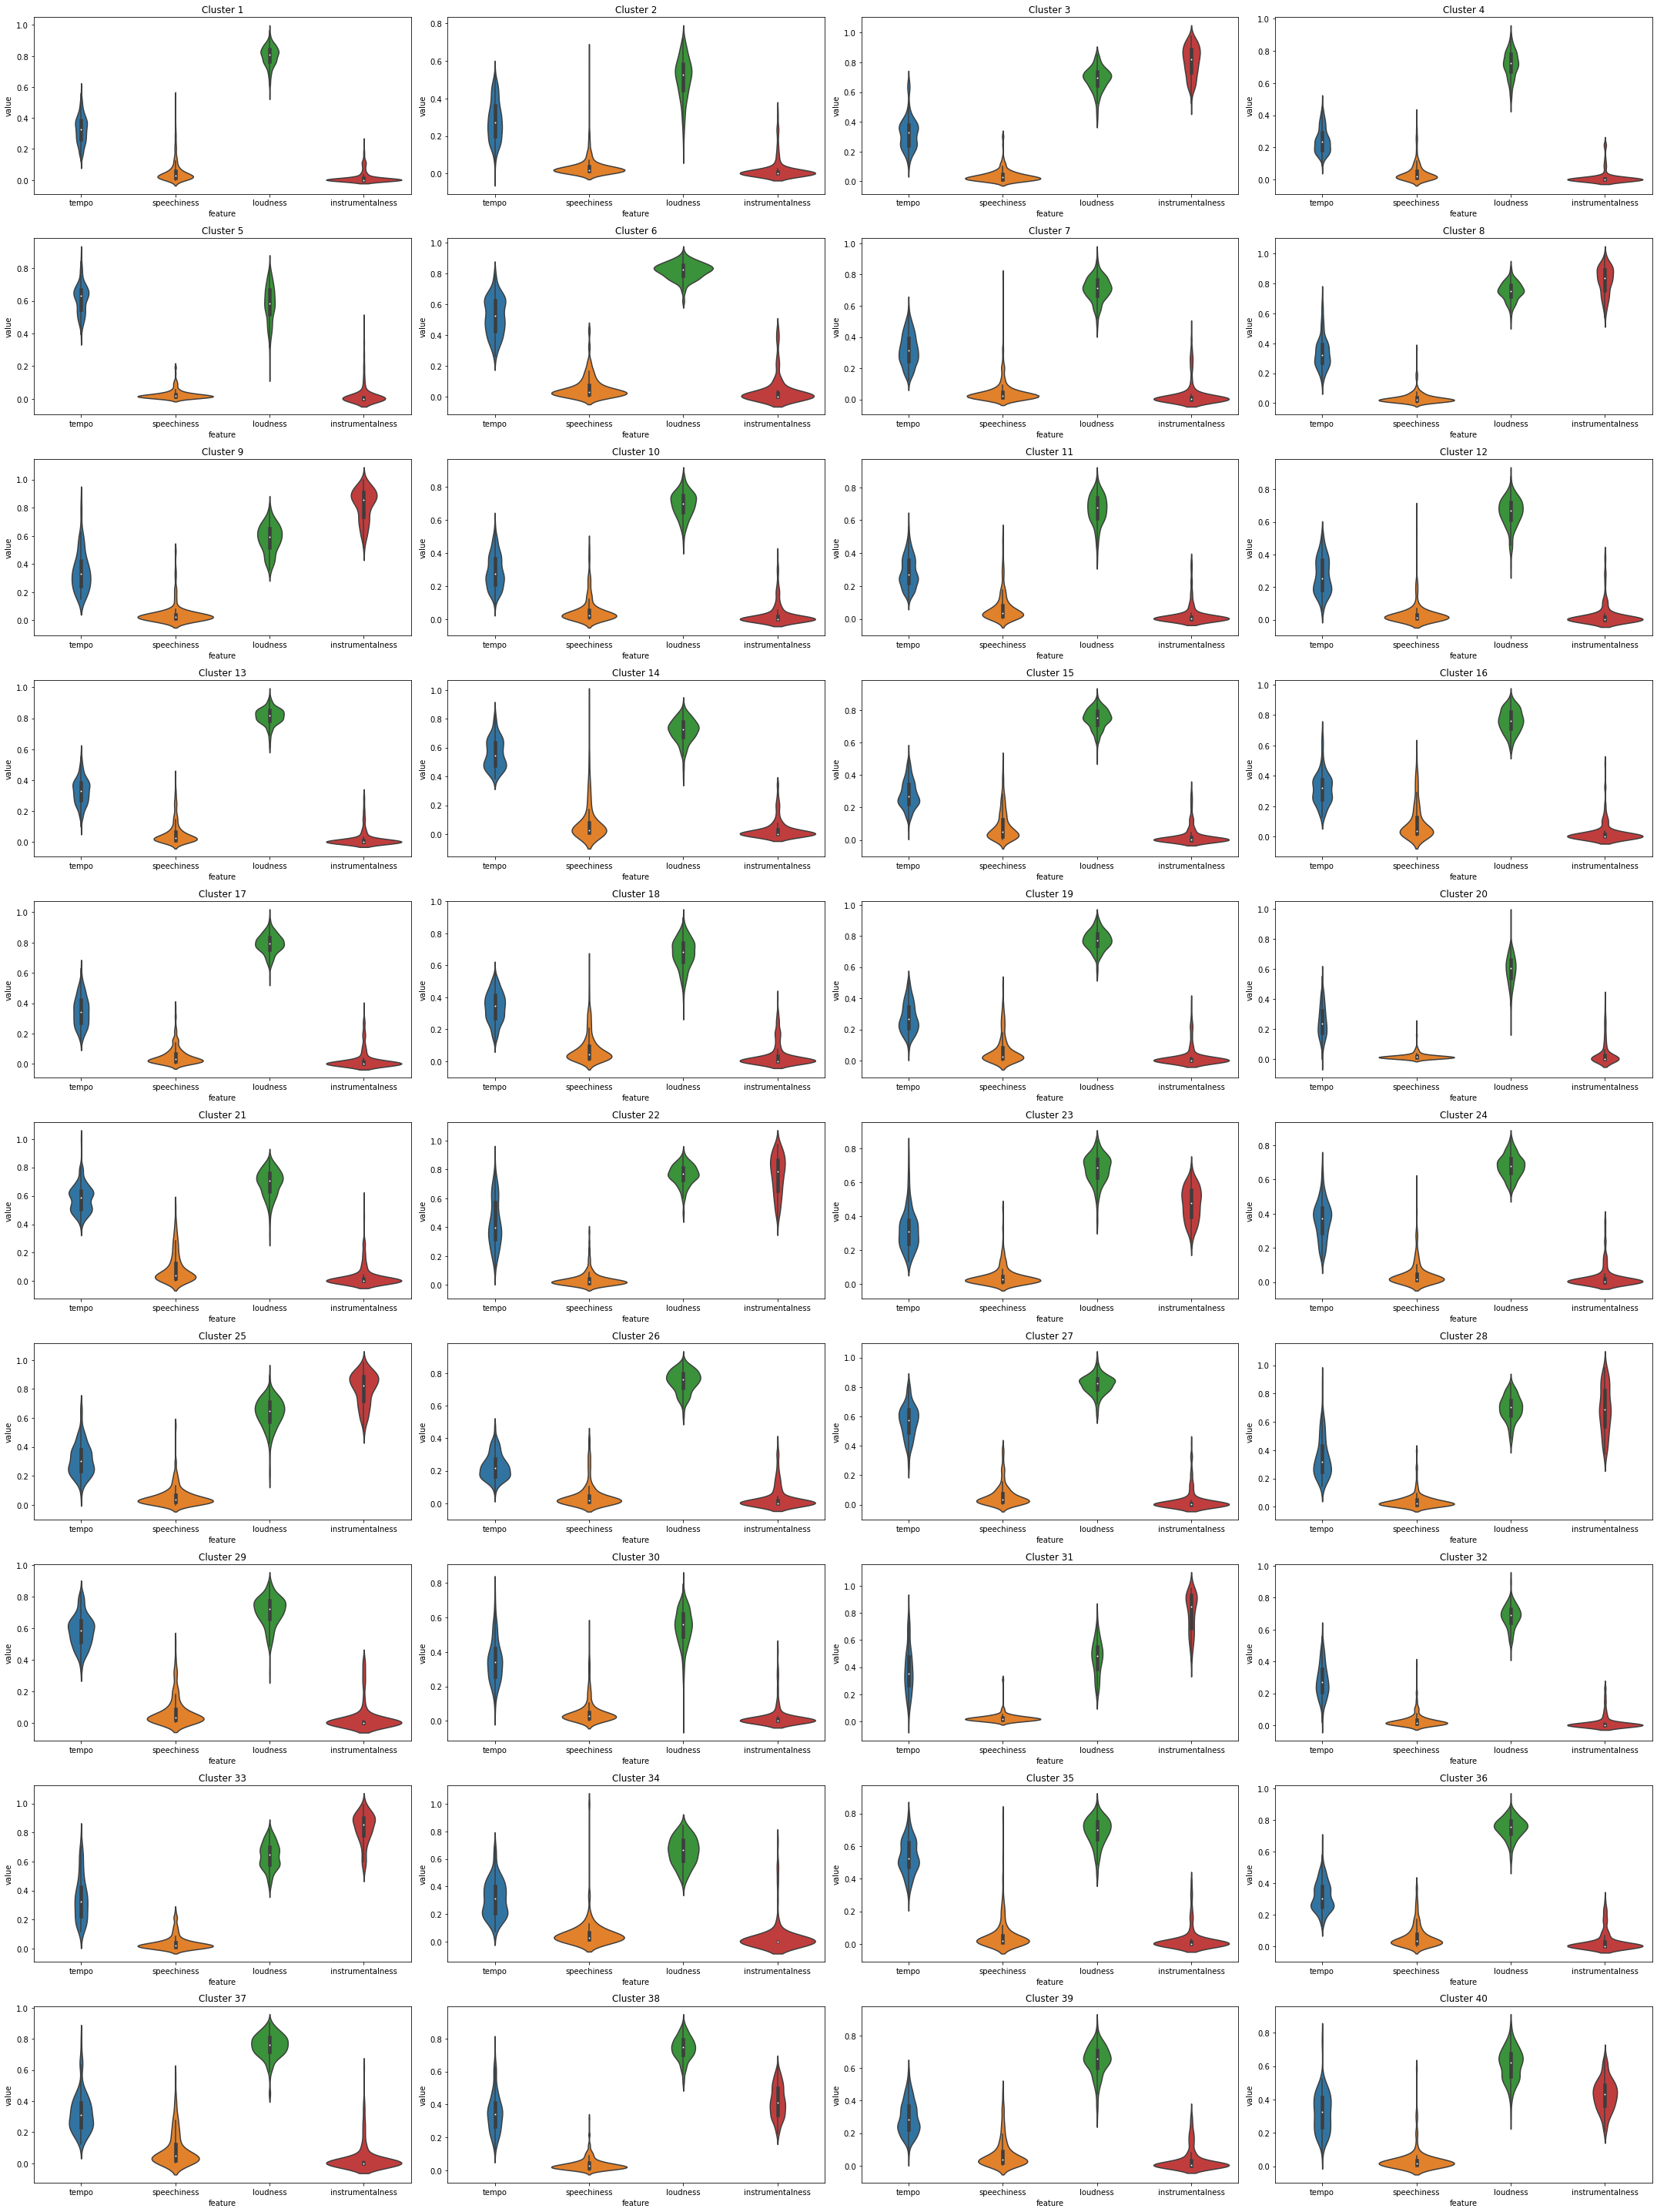

In [ ]:
# create a figure
vp_fig, axes = plt.subplots(10, 4, figsize=(30, 40))

# plot violin plots
plot_idx = 0
for i in range(10):
  for j in range(4):
    sns.violinplot(ax=axes[i, j], x='feature', y='value', data=vplot_df_list[plot_idx]).set_title("Cluster " + str(plot_idx + 1))
    plot_idx += 1
  
vp_fig.tight_layout()
vp_fig.show()

# Taking It One Step Further: Making Playlists for Our Own Liked Songs!



## 1.   Jonathan's Songs

In [ ]:
jc_username = 'jc_716'

scope2 = "user-library-read playlist-read-collaborative playlist-modify-public playlist-modify-private"
# authentication for Jonathan's songs
my_auth2 = SpotifyOAuth(client_id=client_id, client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope2, username=jc_username)

my_auth2._get_auth_response_interactive = types.MethodType(_get_auth_response_interactive, my_auth2)
sp2 = spotipy.Spotify(auth_manager=my_auth2)

In [ ]:
# gets liked songs for current spotify auth
def get_liked_songs(curr_sp):
    # params: curr_sp - current auth

    results = curr_sp.current_user_saved_tracks()
    tracks = []
    songs = results['items']
    # get results
    while results['next']:
        results = curr_sp.next(results)
        songs.extend(results['items'])
    
    # get tracks
    for track in songs:
      to_append = track['track']
      to_append['added_at'] = track['added_at']
      tracks.append(to_append)

    return tracks

In [ ]:
jc_liked_songs = get_liked_songs(sp2)
jc_audio_df = get_audio_features_from_tracks(jc_liked_songs, sp2)

In [ ]:
jc_audio_df.head(10)

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Outside,2i40wZkiPAGIFudrGH99nx,0.3420,0.860,203794,0.749,0.000000,1,0.4460,-6.556,0,0.0905,99.989,0.6000
1,"Bitch, Don’t Kill My Vibe",712uvW1Vezq8WpQi38v2L9,0.0152,0.587,310720,0.698,0.000000,1,0.4420,-8.948,1,0.0943,133.954,0.0985
2,Mystery Lady (feat. Don Toliver),2Ee9amLUslOwgoJWZEpSSD,0.3930,0.747,228453,0.494,0.000000,3,0.0982,-7.957,0,0.1410,76.006,0.6240
3,Divine,2WEL9njjdxNf4DJOnDYexx,0.1490,0.386,193587,0.556,0.000000,5,0.3340,-5.969,1,0.1780,76.174,0.6550
4,Cologne - Single Version,1kx9guD59iMWgLeWh0sfHn,0.0890,0.726,168511,0.511,0.023400,6,0.1130,-8.750,0,0.0826,140.973,0.5980
5,Lemon Baby,5hJBPjlA5HpNGETVcjuAvS,0.1890,0.750,170058,0.586,0.000022,9,0.4250,-7.484,1,0.1750,97.153,0.5800
6,Favorite Mistake,4rHIfYRQw6ittRQXAlurk0,0.7770,0.535,172907,0.409,0.000000,7,0.1290,-9.517,0,0.0855,170.123,0.1380
7,Ride My Bike,2cLmaOOZzVpi8teYw2dkBQ,0.0124,0.606,195573,0.495,0.000000,8,0.1040,-8.349,1,0.1280,131.213,0.2700
8,Fussy,1fFbXlSABWTL7GuzJTS6yu,0.7310,0.631,200613,0.359,0.000000,1,0.0966,-6.771,1,0.0909,179.942,0.5800
9,DITTO,30AnNG3dFbHLQuSbIVWEbF,0.5240,0.645,150323,0.579,0.000018,4,0.1610,-9.137,1,0.1000,92.977,0.5250


In [ ]:
# numeric feature columns
jc_feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# scale data with MinMaxScaler so it's in the range of [0, 1]
jc_features_df = jc_audio_df[jc_feature_cols]
jc_x = jc_features_df.values
min_max_scaler2 = MinMaxScaler()
jc_x_normalized = min_max_scaler2.fit_transform(jc_x)

# convert to pandas dataframe
jc_spotify_df = pd.DataFrame(jc_x_normalized)

In [ ]:
# run k means to create playlists/clusters
jc_kmeans_model = KMeans(init='k-means++', n_clusters=20).fit(jc_x_normalized)

# add cluster numbers to df
jc_audio_df['kmeans'] = jc_kmeans_model.labels_

In [ ]:
# authenticate and create playlists - JONATHAN
# set up authentication
token = util.prompt_for_user_token(jc_username, scope2, client_id=client_id, client_secret=client_secret, redirect_uri='http://localhost:8080/') 
sp3 = spotipy.Spotify(auth=token)

# add playlists to personal spotify account for each cluster
for cluster_num, df in jc_audio_df.groupby(jc_audio_df['kmeans']):
  # create new playlist
  playlist_name = 'Cluster' + str(cluster_num)
  sp3.user_playlist_create(jc_username, name=playlist_name)

In [ ]:
# add songs to specified playlist
def add_songs_to_playlist(curr_sp, playlist_id, song_ids, curr_user):
  # params:
  # playlist_id - id of playlist to add songs to
  # curr_sp - current authentication token
  # song_ids - list of ids of songs to add

  # add songs
  curr_sp.user_playlist_add_tracks(curr_user, playlist_id, song_ids)

In [ ]:
# ids of newly created playlists for Jonathan to add each cluster's songs to
jc_playlist_ids = [
  '3HyYnFzHWhKufdMYw32BHi', '3xoUSpLwvENMxn5hvCLNXg', '4S3o94rC4TxtCDrdW4DEUQ',
  '07a00AVMVb9HE29qjUAGqY', '7MSyK6pSIxXpAhrECVPggq', '1Pc2zoWj2Mxjn22yq8AzBT',
  '4ziKWYrHSeBS1uye7gsViN', '3UsnKQPD9caV8VBajZbapG', '7aMMaTRHOpsKmwbNHlYNoi',
  '3oLMYpclzt8us8nXunoLmg', '1PyTw6QlzPi7fILTgOnHOd', '48nGXSYjvyqTNK747WWKik',
  '67hlzB1UdSCpLJ5DN04Mke', '3faVqylF8rBvO0KyyR0m6s', '7EqnxuFIQDmU9qHLQ6rVCW',
  '4PB3s1TATf9vc0NMHdeSaY', '46AV7AKClCeMKZAjdVhqmC', '4USCJL5uaIQF5SuikKNtL0',
  '3uzFCCZpk3qGauwmHaiZJl', '4rx7pyL9sl5KvdSA341H9x'
]

for cluster_idx, df in jc_audio_df.groupby(jc_audio_df['kmeans']):
  # get playlist id
  curr_pid = jc_playlist_ids[cluster_idx]
  playlist_len = len(df['id'])

  # add songs to playlist, 100 at a time
  for i in range(0, playlist_len, 100):
    add_songs_to_playlist(sp3, curr_pid, df['id'][i:i+100], jc_username)

### Success!

In [ ]:
%%html
<img src='https://drive.google.com/uc?export=view&id=1DnIyozHft6Bk5GhXT22nu0JVfhuNpo24'></img>

## 2.   Anushka's Songs



In [ ]:
# TODO: run on incognito so you have to login to spotify!

aa_username = 'asa5021'
aa_cid = '289b3e9bf87141d5b5e75c712b1ef37d'
aa_cs = '51eccbdec22441b29d960c5641fbc558'
aa_redirect_uri = 'http://www.instagram.com/'

scope2 = "user-library-read playlist-read-collaborative playlist-modify-public playlist-modify-private"

# authentication for Anushka's songs
my_auth3 = SpotifyOAuth(client_id=aa_cid, client_secret=aa_cs,
                                               redirect_uri=aa_redirect_uri,
                                               scope=scope2, username=aa_username)

my_auth3._get_auth_response_interactive = types.MethodType(_get_auth_response_interactive, my_auth3)
sp4 = spotipy.Spotify(auth_manager=my_auth3)

In [ ]:
aa_liked_songs = get_liked_songs(sp4)
aa_audio_df = get_audio_features_from_tracks(aa_liked_songs, sp4)

Couldn't read cache at: .cache-asa5021


Go to the following URL: https://accounts.spotify.com/authorize?client_id=289b3e9bf87141d5b5e75c712b1ef37d&response_type=code&redirect_uri=http%3A%2F%2Fwww.instagram.com%2F&scope=playlist-modify-private+playlist-modify-public+playlist-read-collaborative+user-library-read
Enter the URL you were redirected to: https://www.instagram.com/?code=AQClOJWOdORo-BIYBXUUsR-ZNTtwuL_znEkQSo9hlNLO4weSrZ8HBdfKzJtGcmDG5B9WbZ4TP_T5hr5kEP-xPIxWr0l2x885GX5FKVpcaI6L3FZP27YNxQPBPPuQOhziJL1s-4GyJm5X83U4nHLE7aZZxfTGXCYOTSJZm3VddwfmSm35AbjzwouWSH7i82xDiJxlMg6qZjkh-Pe-CGzmiDD3nS6_vYKW-BjfZV018ncUm0KvAJcDyR_gOasGx7F8pEbrBLX3ENDS8J7m8-jRpE3Sm9uuiaBc_VbvQl0w


In [ ]:
aa_audio_df.head(10)

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,aloe,1gO4R8PoR9BphhqomW0Y1C,0.21600,0.768,258000,0.594,0.473000,1,0.1150,-7.929,0,0.0320,120.012,0.869
1,You Got Me Flying,2nVVF4g2pt1gjzMuQR8A6i,0.07180,0.655,184254,0.500,0.415000,3,0.2000,-5.622,0,0.1300,162.370,0.621
2,Vibrate,4N3YM2DBf9lmZ9fTTgQowk,0.18200,0.709,187698,0.681,0.000000,7,0.1830,-3.729,0,0.1150,134.065,0.593
3,i walk this earth all by myself,5a8QUc4ubHJqQm7vzs2YhA,0.50700,0.595,145634,0.588,0.781000,10,0.1130,-11.313,1,0.0624,166.061,0.518
4,Buy U a Drank (Shawty Snappin') (feat. Yung Joc),1tkMs9wDPknQ3ZHcKDw1ES,0.01090,0.693,227960,0.549,0.000000,1,0.0677,-8.141,1,0.1190,80.028,0.605
5,No Más!,3Sxd2zTEoWwMPAVbBJGwAC,0.00856,0.601,186000,0.875,0.000000,11,0.4040,-6.382,0,0.1940,92.178,0.340
6,"Wake Up, Get Down",1gEB5InUzgNLHPv8H34v54,0.37200,0.747,259817,0.453,0.000276,10,0.1250,-10.563,0,0.4290,108.911,0.374
7,I Can't Lose,0DwMf9EDIXnFRTcZrePq6x,0.21000,0.678,197500,0.627,0.000000,10,0.3970,-10.659,0,0.1640,115.062,0.365
8,bayridge,6GijrCnVsghoXzLOt2elDw,0.19400,0.776,206061,0.579,0.001070,4,0.1330,-8.413,0,0.0771,79.968,0.891
9,Hail Mary,4qDSOWEiLm69TITaXrVoRy,0.69900,0.738,179006,0.326,0.008380,7,0.1120,-9.651,0,0.0401,125.993,0.818


In [ ]:
# numeric feature columns
aa_feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# scale data with MinMaxScaler so it's in the range of [0, 1]
aa_features_df = aa_audio_df[aa_feature_cols]
aa_x = aa_features_df.values
min_max_scaler3 = MinMaxScaler()
aa_x_normalized = min_max_scaler3.fit_transform(aa_x)

# convert to pandas dataframe
aa_spotify_df = pd.DataFrame(aa_x_normalized)

In [ ]:
# run k means to create playlists/clusters
aa_kmeans_model = KMeans(init='k-means++', n_clusters=20).fit(aa_x_normalized)

# add cluster numbers to df
aa_audio_df['kmeans'] = aa_kmeans_model.labels_

In [ ]:
# authenticate and create playlists - ANUSHKA
# set up authentication
token = util.prompt_for_user_token(aa_username, scope2, client_id=aa_cid, client_secret=aa_cs, redirect_uri=aa_redirect_uri) 
sp5 = spotipy.Spotify(auth=token)

# add playlists to personal spotify account for each cluster
for cluster_num, df in aa_audio_df.groupby(aa_audio_df['kmeans']):
  # create new playlist
  playlist_name = 'Cluster' + str(cluster_num)
  sp5.user_playlist_create(aa_username, name=playlist_name)

In [ ]:
# ids of newly created playlists for Anushka to add each cluster's songs to
aa_playlist_ids = [
  '15y4ijSzd8XNS0MJF7Zhmp', '5ByDPEuV9CpydMfb8oxpKa', '55574emmHJdizJYLofyRqS',
  '6tL1AdA4o57ZEqi7Z8mJyj', '4kWR5d9BiOlB0AB3EJOPmP', '4JftQBgQXnWgizi2eFBB0g',
  '3cP4CF5vFG5vVMGZZbEEp4', '2tpjp0ROLq5rPHaPrqYmBo', '4347vyeM9GMjvmICAbSsuK',
  '75FSM0s1JlwmWDmOWHlmPB', '6Lw36B8giYrMuUb3RIyMil', '2fCkZQbdVB1MTd1z0wjDJe',
  '344P0CpfQHtKzXGKUlXcZV', '6diJ5ikHuNhMV9e6Any4kX', '3b9Kbdz4qp5Wmk48FNvQD0',
  '3ouM4O63MToEZgRDXlmnUF', '41BkoAEAWg1XrxuyokvW80', '7i1uBG0yG1vURrGWP4WF6i', 
  '4imumEY9Ne48jvZAoy2P2k', '1aWN31IWxWFtrYEJMEpiv8'
]

for cluster_idx, df in aa_audio_df.groupby(aa_audio_df['kmeans']):
  # get playlist id
  curr_pid = aa_playlist_ids[cluster_idx]
  playlist_len = len(df['id'])

  # add songs to playlist, 100 at a time
  for i in range(0, playlist_len, 100):
    add_songs_to_playlist(sp5, curr_pid, df['id'][i:i+100], aa_username)

## 3.   Hannah's Songs!



In [ ]:
# TODO: run on incognito so you have to login to spotify!

hm_username = 'hannah7515'
hm_cid = 'd64008f4150d4b569b63049862af178c'
hm_cs = '233e0b9e569a4f8b98e18619b69d71b3'
hm_redirect_uri = 'https://twitter.com'

scope2 = "user-library-read playlist-read-collaborative playlist-modify-public playlist-modify-private"

# authentication for Hannah's songs
my_auth4 = SpotifyOAuth(client_id=hm_cid, client_secret=hm_cs,
                                               redirect_uri=hm_redirect_uri,
                                               scope=scope2, username=hm_username)

my_auth4._get_auth_response_interactive = types.MethodType(_get_auth_response_interactive, my_auth4)
sp6 = spotipy.Spotify(auth_manager=my_auth4)

In [ ]:
hm_liked_songs = get_liked_songs(sp6)
hm_audio_df = get_audio_features_from_tracks(hm_liked_songs, sp6)

Couldn't read cache at: .cache-hannah7515


KeyboardInterrupt: ignored

In [ ]:
hm_audio_df.head(10)

,name,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Dapper (feat. Anderson .Paak),2Nh2cMryoXl7BrZoIeN2Pr,0.0711,0.753,193093,0.594,0.000000,1,0.3910,-9.486,0,0.0816,112.568,0.5620
1,Outside,2i40wZkiPAGIFudrGH99nx,0.3420,0.860,203794,0.749,0.000000,1,0.4460,-6.556,0,0.0905,99.989,0.6000
2,"Bitch, Don’t Kill My Vibe",712uvW1Vezq8WpQi38v2L9,0.0152,0.587,310720,0.698,0.000000,1,0.4420,-8.948,1,0.0943,133.954,0.0985
3,Mystery Lady (feat. Don Toliver),2Ee9amLUslOwgoJWZEpSSD,0.3930,0.747,228453,0.494,0.000000,3,0.0982,-7.957,0,0.1410,76.006,0.6240
4,Divine,2WEL9njjdxNf4DJOnDYexx,0.1490,0.386,193587,0.556,0.000000,5,0.3340,-5.969,1,0.1780,76.174,0.6550
5,Cologne - Single Version,1kx9guD59iMWgLeWh0sfHn,0.0890,0.726,168511,0.511,0.023400,6,0.1130,-8.750,0,0.0826,140.973,0.5980
6,Lemon Baby,5hJBPjlA5HpNGETVcjuAvS,0.1890,0.750,170058,0.586,0.000022,9,0.4250,-7.484,1,0.1750,97.153,0.5800
7,Favorite Mistake,4rHIfYRQw6ittRQXAlurk0,0.7770,0.535,172907,0.409,0.000000,7,0.1290,-9.517,0,0.0855,170.123,0.1380
8,Ride My Bike,2cLmaOOZzVpi8teYw2dkBQ,0.0124,0.606,195573,0.495,0.000000,8,0.1040,-8.349,1,0.1280,131.213,0.2700
9,Fussy,1fFbXlSABWTL7GuzJTS6yu,0.7310,0.631,200613,0.359,0.000000,1,0.0966,-6.771,1,0.0909,179.942,0.5800


In [ ]:
# numeric feature columns
hm_feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# scale data with MinMaxScaler so it's in the range of [0, 1]
hm_features_df = hm_audio_df[hm_feature_cols]
hm_x = hm_features_df.values
min_max_scaler4 = MinMaxScaler()
hm_x_normalized = min_max_scaler4.fit_transform(hm_x)

# convert to pandas dataframe
hm_spotify_df = pd.DataFrame(hm_x_normalized)

In [ ]:
# run k means to create playlists/clusters
# TODO: fill in num clusters
hm_kmeans_model = KMeans(init='k-means++', n_clusters=???).fit(hm_x_normalized)

# add cluster numbers to df
hm_audio_df['kmeans'] = hm_kmeans_model.labels_

In [ ]:
# authenticate and create playlists - HANNAH
# set up authentication
token = util.prompt_for_user_token(hm_username, scope2, client_id=hm_cid, client_secret=hm_cs, redirect_uri=hm_redirect_uri) 
sp7 = spotipy.Spotify(auth=token)

# add playlists to personal spotify account for each cluster
for cluster_num, df in hm_audio_df.groupby(hm_audio_df['kmeans']):
  # create new playlist
  playlist_name = 'Cluster' + str(cluster_num)
  sp7.user_playlist_create(hm_username, name=playlist_name)

In [ ]:
# ids of newly created playlists for Anushka to add each cluster's songs to
hm_playlist_ids = [
  
]

for cluster_idx, df in hm_audio_df.groupby(hm_audio_df['kmeans']):
  # get playlist id
  curr_pid = hm_playlist_ids[cluster_idx]
  playlist_len = len(df['id'])

  # add songs to playlist, 100 at a time
  for i in range(0, playlist_len, 100):
    add_songs_to_playlist(sp7, curr_pid, df['id'][i:i+100], hm_username)

## Comparing Our Music Tastes By Genre

In [ ]:
# get genres for Jonathan
jc_genres = get_genres_from_tracks(jc_liked_songs, sp2)

KeyboardInterrupt: ignored

In [ ]:
# create genres df with Jonathan's genres
genres_df = pd.DataFrame.from_dict(jc_genres, orient='index').reset_index()
genres_df.columns = ['genre', 'count']
genres_df['person'] = ['Jonathan' for i in range(len(genres_df.index))]

# get top 30 genres from Jonathan
genres_df = genres_df.sort_values(by='count', ascending=False).head(30)

In [ ]:
# make genre bar plot
tips = px.data.tips()
fig = px.bar(genres_df, x='genre', y='count', color="person", title='Number of Songs Per Genre')
fig.show()

In [25]:
# TODO: Add anushka's genres
aa_genres = get_genres_from_tracks(aa_liked_songs, sp5)

In [26]:
# create genres df with Anushka's genres
aa_genres_df = pd.DataFrame.from_dict(aa_genres, orient='index').reset_index()
aa_genres_df.columns = ['genre', 'count']
aa_genres_df['person'] = ['Anushka' for i in range(len(aa_genres_df.index))]

# get top 30 genres from Jonathan
aa_genres_df = aa_genres_df.sort_values(by='count', ascending=False).head(30)

In [27]:
# make genre bar plot
tips = px.data.tips()
fig = px.bar(aa_genres_df, x='genre', y='count', color="person", title='Number of Songs Per Genre')
fig.show()

In [ ]:
# TODO: Add hannah's genres

# Party Playlist

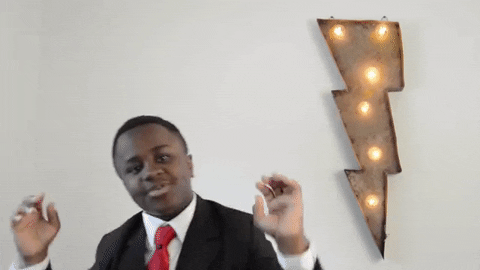